<a href="https://colab.research.google.com/github/Harikeshvarthan1/bajaj-finserv/blob/main/21BDS0092.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# REGNO: 21BDS0092
# NAME: R Harikesh vardhan

# Exploratory Data Analysis (EDA)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import ttest_ind

## Load Dataset

In [ ]:
import numpy as np
url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/KosteckiDillon.csv'
data = pd.read_csv(url)

# Splitting the dataset into two dataframes
dataf1 = data.iloc[:len(data)//2] # First half
dataf2 = data.iloc[len(data)//2:] # Second half
print(dataf1.shape)
dataf1.head(10)

(2076, 10)


,rownames,id,time,dos,hatype,age,airq,medication,headache,sex
0,1,1,-11,753,Aura,30,9.0,continuing,yes,female
1,2,1,-10,754,Aura,30,7.0,continuing,yes,female
2,3,1,-9,755,Aura,30,10.0,continuing,yes,female
3,4,1,-8,756,Aura,30,13.0,continuing,yes,female
4,5,1,-7,757,Aura,30,18.0,continuing,yes,female
5,6,1,-6,758,Aura,30,19.0,continuing,yes,female
6,7,1,-5,759,Aura,30,17.0,continuing,yes,female
7,8,1,22,786,Aura,30,21.0,continuing,yes,female
8,9,1,23,787,Aura,30,21.0,continuing,yes,female
9,10,1,24,788,Aura,30,18.0,continuing,yes,female


In [ ]:
#getting first 10 elements from dataframe2
print(dataf2.shape)
dataf2.head(10)

(2076, 10)


,rownames,id,time,dos,hatype,age,airq,medication,headache,sex
2076,2077,67,-22,560,No Aura,46,29.0,continuing,yes,female
2077,2078,67,-21,561,No Aura,46,14.0,continuing,yes,female
2078,2079,67,-20,562,No Aura,46,33.0,continuing,yes,female
2079,2080,67,-19,563,No Aura,46,37.0,continuing,yes,female
2080,2081,67,-18,564,No Aura,46,36.0,continuing,yes,female
2081,2082,67,-17,565,No Aura,46,48.0,continuing,yes,female
2082,2083,67,-16,566,No Aura,46,45.0,continuing,yes,female
2083,2084,67,1,583,No Aura,46,18.0,continuing,yes,female
2084,2085,67,2,584,No Aura,46,26.0,continuing,yes,female
2085,2086,67,3,585,No Aura,46,29.0,continuing,yes,female


## concatenate the two dataframes row-wise

In [ ]:
concat_rows = pd.concat([dataf1, dataf2], ignore_index=True)
print("Concatenated (row-wise):")
print(concat_rows)

Concatenated (row-wise):
      rownames   id  time   dos hatype  age  airq  medication headache     sex
0            1    1   -11   753   Aura   30   9.0  continuing      yes  female
1            2    1   -10   754   Aura   30   7.0  continuing      yes  female
2            3    1    -9   755   Aura   30  10.0  continuing      yes  female
3            4    1    -8   756   Aura   30  13.0  continuing      yes  female
4            5    1    -7   757   Aura   30  18.0  continuing      yes  female
...        ...  ...   ...   ...    ...  ...   ...         ...      ...     ...
4147      4148  133    44  1232   Aura   26  20.0  continuing      yes    male
4148      4149  133    45  1233   Aura   26  27.0  continuing       no    male
4149      4150  133    46  1234   Aura   26  28.0  continuing       no    male
4150      4151  133    47  1235   Aura   26  33.0  continuing       no    male
4151      4152  133    48  1236   Aura   26  25.0  continuing      yes    male

[4152 rows x 10 columns]


## concatenate the two dataframes column-wise

In [ ]:
concat_cols = pd.concat([dataf1, dataf2], axis=1)
print("Concatenated (column-wise):")
print(concat_cols)

Concatenated (column-wise):
      rownames   id  time    dos hatype   age  airq  medication headache  \
0          1.0  1.0 -11.0  753.0   Aura  30.0   9.0  continuing      yes   
1          2.0  1.0 -10.0  754.0   Aura  30.0   7.0  continuing      yes   
2          3.0  1.0  -9.0  755.0   Aura  30.0  10.0  continuing      yes   
3          4.0  1.0  -8.0  756.0   Aura  30.0  13.0  continuing      yes   
4          5.0  1.0  -7.0  757.0   Aura  30.0  18.0  continuing      yes   
...        ...  ...   ...    ...    ...   ...   ...         ...      ...   
4147       NaN  NaN   NaN    NaN    NaN   NaN   NaN         NaN      NaN   
4148       NaN  NaN   NaN    NaN    NaN   NaN   NaN         NaN      NaN   
4149       NaN  NaN   NaN    NaN    NaN   NaN   NaN         NaN      NaN   
4150       NaN  NaN   NaN    NaN    NaN   NaN   NaN         NaN      NaN   
4151       NaN  NaN   NaN    NaN    NaN   NaN   NaN         NaN      NaN   

         sex  rownames     id  time     dos hatype   age  a

## Merging data

Split the dataset into four parts and perform merge operations on the resulting dataframes using:  

- Left Join
- Right Join  
- Inner Join  
- Outer Join

In [ ]:
#first checking the column that are presented
print(data.columns)

Index(['rownames', 'id', 'time', 'dos', 'hatype', 'age', 'airq', 'medication',
       'headache', 'sex'],
      dtype='object')


In [ ]:
# Splitting the dataset into 4 dataframes
dataf11 = data.iloc[: len(data)//4] # First quarter
dataf12 = data.iloc[len(data)//4:len(data)//2] # Second quarter
dataf13 = data.iloc[len(data)//2:3*len(data)//4]# Third quarter
dataf14 = data.iloc[3*len(data)//4:]# Fourth quarter

In [ ]:
#Concat()

dataf22 = pd.concat([dataf11, dataf12], ignore_index=True)
dataf44 = pd.concat([dataf13, dataf14], ignore_index=True)

In [ ]:
#Inner join
df_inner = dataf22.merge(dataf44, how='inner')
print(df_inner.shape)
print("Inner Join:")
print(df_inner.head())

(0, 10)
Inner Join:
Empty DataFrame
Columns: [rownames, id, time, dos, hatype, age, airq, medication, headache, sex]
Index: []


In [ ]:
#Left join
df_left = dataf22.merge(dataf44, how='left')
print(df_left.shape)
print("Left Join:")
print(df_left.head())

(2076, 10)
Left Join:
   rownames  id  time  dos hatype  age  airq  medication headache     sex
0         1   1   -11  753   Aura   30   9.0  continuing      yes  female
1         2   1   -10  754   Aura   30   7.0  continuing      yes  female
2         3   1    -9  755   Aura   30  10.0  continuing      yes  female
3         4   1    -8  756   Aura   30  13.0  continuing      yes  female
4         5   1    -7  757   Aura   30  18.0  continuing      yes  female


In [ ]:
#Right Join
df_right = dataf22.merge(dataf44, how='right')
print(df_right.shape)
print("Right Join:")
print(df_right.head())

(2076, 10)
Right Join:
   rownames  id  time  dos   hatype  age  airq  medication headache     sex
0      2077  67   -22  560  No Aura   46  29.0  continuing      yes  female
1      2078  67   -21  561  No Aura   46  14.0  continuing      yes  female
2      2079  67   -20  562  No Aura   46  33.0  continuing      yes  female
3      2080  67   -19  563  No Aura   46  37.0  continuing      yes  female
4      2081  67   -18  564  No Aura   46  36.0  continuing      yes  female


In [ ]:
#outer Join
df_outer = dataf22.merge(dataf44, how='outer')
print(df_outer.shape)
print("outer Join:")
print(df_outer.head())

(4152, 10)
outer Join:
   rownames  id  time  dos hatype  age  airq  medication headache     sex
0         1   1   -11  753   Aura   30   9.0  continuing      yes  female
1         2   1   -10  754   Aura   30   7.0  continuing      yes  female
2         3   1    -9  755   Aura   30  10.0  continuing      yes  female
3         4   1    -8  756   Aura   30  13.0  continuing      yes  female
4         5   1    -7  757   Aura   30  18.0  continuing      yes  female


## Reshaping with Hierarchical Indexing

In [ ]:
data.describe()

,rownames,id,time,dos,age,airq
count,4152.000000,4152.000000,4152.000000,4152.000000,4152.000000,4152.000000
mean,2076.500000,66.386802,15.455684,646.705925,42.363921,24.826012
std,1198.723488,39.121812,21.737211,335.770123,11.201244,9.514274
min,1.000000,1.000000,-29.000000,98.000000,18.000000,3.000000
25%,1038.750000,33.000000,3.000000,384.000000,33.000000,18.000000
50%,2076.500000,67.000000,12.000000,623.000000,44.000000,24.000000
75%,3114.250000,100.000000,24.000000,950.000000,50.000000,29.000000
max,4152.000000,133.000000,99.000000,1239.000000,66.000000,73.000000


In [ ]:
df_reshaped = data.set_index(['rownames', 'sex']).sort_index()
print("Reshaped with hierarchical indexing:")
print(df_reshaped.head())

Reshaped with hierarchical indexing:
                 id  time  dos hatype  age  airq  medication headache
rownames sex                                                         
1        female   1   -11  753   Aura   30   9.0  continuing      yes
2        female   1   -10  754   Aura   30   7.0  continuing      yes
3        female   1    -9  755   Aura   30  10.0  continuing      yes
4        female   1    -8  756   Aura   30  13.0  continuing      yes
5        female   1    -7  757   Aura   30  18.0  continuing      yes


In [ ]:
stacked = df_reshaped.stack()
stacked

rownames  sex               
1         female  id                     1
                  time                 -11
                  dos                  753
                  hatype              Aura
                  age                   30
                                   ...    
4152      male    hatype              Aura
                  age                   26
                  airq                25.0
                  medication    continuing
                  headache             yes
Length: 33216, dtype: object

In [ ]:
stacked.unstack()

,,id,time,dos,hatype,age,airq,medication,headache
rownames,sex,,,,,,,,
1,female,1,-11,753,Aura,30,9.0,continuing,yes
2,female,1,-10,754,Aura,30,7.0,continuing,yes
3,female,1,-9,755,Aura,30,10.0,continuing,yes
4,female,1,-8,756,Aura,30,13.0,continuing,yes
5,female,1,-7,757,Aura,30,18.0,continuing,yes
...,...,...,...,...,...,...,...,...,...
4148,male,133,44,1232,Aura,26,20.0,continuing,yes
4149,male,133,45,1233,Aura,26,27.0,continuing,no
4150,male,133,46,1234,Aura,26,28.0,continuing,no


## Transformation Techniques

### 1. Data duplication

In [ ]:
deduplicat_df = data.drop_duplicates()
print("Deduplicated DataFrame:")
print(deduplicat_df)

Deduplicated DataFrame:
      rownames   id  time   dos hatype  age  airq  medication headache     sex
0            1    1   -11   753   Aura   30   9.0  continuing      yes  female
1            2    1   -10   754   Aura   30   7.0  continuing      yes  female
2            3    1    -9   755   Aura   30  10.0  continuing      yes  female
3            4    1    -8   756   Aura   30  13.0  continuing      yes  female
4            5    1    -7   757   Aura   30  18.0  continuing      yes  female
...        ...  ...   ...   ...    ...  ...   ...         ...      ...     ...
4147      4148  133    44  1232   Aura   26  20.0  continuing      yes    male
4148      4149  133    45  1233   Aura   26  27.0  continuing       no    male
4149      4150  133    46  1234   Aura   26  28.0  continuing       no    male
4150      4151  133    47  1235   Aura   26  33.0  continuing       no    male
4151      4152  133    48  1236   Aura   26  25.0  continuing      yes    male

[4152 rows x 10 columns]


### 2. Replacing values from the dataset to a new dataset

In [ ]:
replaced_df = deduplicat_df.copy()
replaced_df['headache'] = replaced_df['headache'].replace({'yes': 'Y', 'no': 'N'})
print("Original DataFrame:")
print(data)
print("\nDataFrame with replaced values:")
print(replaced_df)

Original DataFrame:
      rownames   id  time   dos hatype  age  airq  medication headache     sex
0            1    1   -11   753   Aura   30   9.0  continuing      yes  female
1            2    1   -10   754   Aura   30   7.0  continuing      yes  female
2            3    1    -9   755   Aura   30  10.0  continuing      yes  female
3            4    1    -8   756   Aura   30  13.0  continuing      yes  female
4            5    1    -7   757   Aura   30  18.0  continuing      yes  female
...        ...  ...   ...   ...    ...  ...   ...         ...      ...     ...
4147      4148  133    44  1232   Aura   26  20.0  continuing      yes    male
4148      4149  133    45  1233   Aura   26  27.0  continuing       no    male
4149      4150  133    46  1234   Aura   26  28.0  continuing       no    male
4150      4151  133    47  1235   Aura   26  33.0  continuing       no    male
4151      4152  133    48  1236   Aura   26  25.0  continuing      yes    male

[4152 rows x 10 columns]

DataF

### 3. Handling missing data

In [ ]:
missingdata = data.isnull().sum()
print("Missing data count per column are:")
print(missingdata)

Missing data count per column are:
rownames      0
id            0
time          0
dos           0
hatype        0
age           0
airq          0
medication    0
headache      0
sex           0
dtype: int64


### 4. Dropping missing values

In [ ]:
dropped_na = data.dropna()
print("DataFrame after dropping missing values:")
print(dropped_na.head())
data.isnull().values.any()

DataFrame after dropping missing values:
   rownames  id  time  dos hatype  age  airq  medication headache     sex
0         1   1   -11  753   Aura   30   9.0  continuing      yes  female
1         2   1   -10  754   Aura   30   7.0  continuing      yes  female
2         3   1    -9  755   Aura   30  10.0  continuing      yes  female
3         4   1    -8  756   Aura   30  13.0  continuing      yes  female
4         5   1    -7  757   Aura   30  18.0  continuing      yes  female


False

### 5. Filling missing values

In [ ]:
#Filling missing values with 'Mean' value
df_filled_na = data.fillna(data.mean(numeric_only=True))
print("DataFrame after filling missing values:")
print(df_filled_na.head())
data.isnull().values.any()

DataFrame after filling missing values:
   rownames  id  time  dos hatype  age  airq  medication headache     sex
0         1   1   -11  753   Aura   30   9.0  continuing      yes  female
1         2   1   -10  754   Aura   30   7.0  continuing      yes  female
2         3   1    -9  755   Aura   30  10.0  continuing      yes  female
3         4   1    -8  756   Aura   30  13.0  continuing      yes  female
4         5   1    -7  757   Aura   30  18.0  continuing      yes  female


False

In [ ]:
#checking for non numerical data (non numeric na type)
for col in data.columns:
    if data[col].dtype == "object":
        print(f"Column: {col}")
        print(data[col].str.isnumeric().value_counts(), "\n")

Column: hatype
hatype
False    4152
Name: count, dtype: int64 

Column: medication
medication
False    4152
Name: count, dtype: int64 

Column: headache
headache
False    4152
Name: count, dtype: int64 

Column: sex
sex
False    4152
Name: count, dtype: int64 



## Detecting and removing the outliers

#### Outliers should be removed before binning because outliers distort bin ranges and create misleading groupings.

In [ ]:
# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = deduplicat_df['airq'].quantile(0.25)
Q3 = deduplicat_df['airq'].quantile(0.75)

# Compute IQR
IQR = Q3 - Q1

#Bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = deduplicat_df[(deduplicat_df['airq'] < lower_bound) | (deduplicat_df['airq'] > upper_bound)]

print("Outliers in 'airq' column:")
print(outliers[['airq']])

df = deduplicat_df[(deduplicat_df['airq'] >= lower_bound) & (deduplicat_df['airq'] <= upper_bound)]

print("\nDataset after filtering out outliers:")
print(df[['airq']])

Outliers in 'airq' column:
      airq
329   48.0
330   53.0
460   59.0
462   49.0
463   59.0
...    ...
3248  49.0
3256  48.0
3284  46.0
3372  49.0
3413  47.0

[157 rows x 1 columns]

Dataset after filtering out outliers:
      airq
0      9.0
1      7.0
2     10.0
3     13.0
4     18.0
...    ...
4147  20.0
4148  27.0
4149  28.0
4150  33.0
4151  25.0

[3995 rows x 1 columns]


## Concept of discretization and binning

In [ ]:
import pandas as pd
min_airq = df['airq'].min()
max_airq = df['airq'].max()

bins = [min_airq, Q1, df['airq'].median(), Q3, max_airq]
bin_labels = ['Low', 'Below Median', 'Above Median', 'High']

df['airq_binned'] = pd.cut(df['airq'], bins=bins, labels=bin_labels, include_lowest=True)

print("Discretized (Binned) 'airq' Column:")
print(df['airq_binned'].value_counts())
print(df[['airq', 'airq_binned']].head())


Discretized (Binned) 'airq' Column:
airq_binned
Low             1140
Below Median    1026
Above Median     995
High             834
Name: count, dtype: int64
   airq airq_binned
0   9.0         Low
1   7.0         Low
2  10.0         Low
3  13.0         Low
4  18.0         Low


<ipython-input-24-53571c724b32>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['airq_binned'] = pd.cut(df['airq'], bins=bins, labels=bin_labels, include_lowest=True)


In [ ]:
#To calculate derived metric based on airq and age
df['AirQ_Age_Index'] = df['airq'] * df['age']
df

<ipython-input-25-c7b223408abd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AirQ_Age_Index'] = df['airq'] * df['age']


,rownames,id,time,dos,hatype,age,airq,medication,headache,sex,airq_binned,AirQ_Age_Index
0,1,1,-11,753,Aura,30,9.0,continuing,yes,female,Low,270.0
1,2,1,-10,754,Aura,30,7.0,continuing,yes,female,Low,210.0
2,3,1,-9,755,Aura,30,10.0,continuing,yes,female,Low,300.0
3,4,1,-8,756,Aura,30,13.0,continuing,yes,female,Low,390.0
4,5,1,-7,757,Aura,30,18.0,continuing,yes,female,Low,540.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4147,4148,133,44,1232,Aura,26,20.0,continuing,yes,male,Below Median,520.0
4148,4149,133,45,1233,Aura,26,27.0,continuing,no,male,Above Median,702.0
4149,4150,133,46,1234,Aura,26,28.0,continuing,no,male,Above Median,728.0
4150,4151,133,47,1235,Aura,26,33.0,continuing,no,male,High,858.0


In [ ]:
mean_airq = df['airq'].mean()
median_airq = df['airq'].median()
mode_airq = df['airq'].mode()[0]

print(f"Mean of airq: {mean_airq}")
print(f"Median of airq: {median_airq}")
print(f"Mode of airq: {mode_airq}")

Mean of airq: 23.75834793491865
Median of airq: 24.0
Mode of airq: 24.8


In [ ]:
#Display all the columns and rows from the preceding table if airq is greater than median(24.0)
df[df["airq"] > 24]

,rownames,id,time,dos,hatype,age,airq,medication,headache,sex,airq_binned,AirQ_Age_Index
14,15,1,30,794,Aura,30,29.0,continuing,yes,female,Above Median,870.0
22,23,2,3,130,Aura,36,29.0,continuing,no,female,Above Median,1044.0
23,24,2,4,131,Aura,36,33.0,continuing,yes,female,High,1188.0
24,25,2,5,132,Aura,36,30.0,continuing,yes,female,High,1080.0
28,29,2,9,136,Aura,36,27.0,continuing,yes,female,Above Median,972.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4135,4136,133,29,1217,Aura,26,25.0,continuing,yes,male,Above Median,650.0
4148,4149,133,45,1233,Aura,26,27.0,continuing,no,male,Above Median,702.0
4149,4150,133,46,1234,Aura,26,28.0,continuing,no,male,Above Median,728.0
4150,4151,133,47,1235,Aura,26,33.0,continuing,no,male,High,858.0


## Univariate analysis

### Barplot

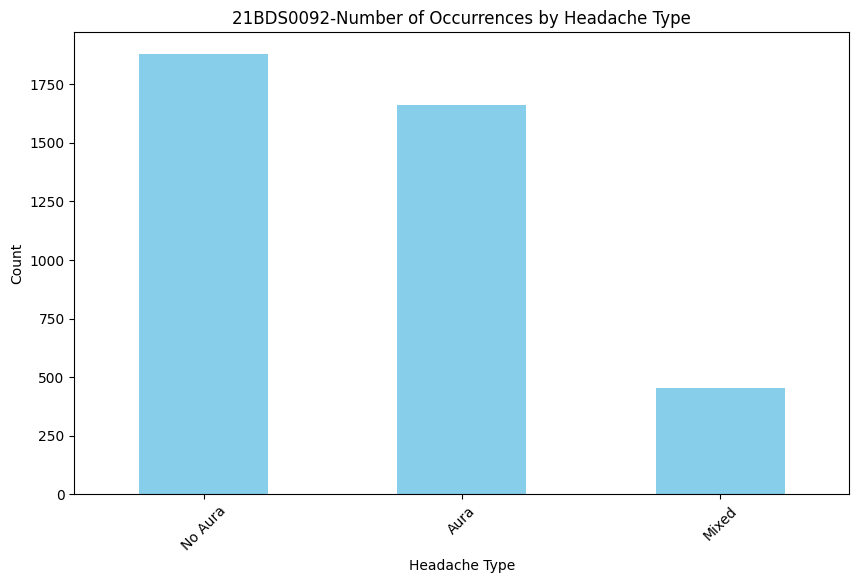

In [ ]:
df['hatype'].value_counts().nlargest(10).plot(kind='bar', figsize=(10,6), color='skyblue')

plt.title("21BDS0092-Number of Occurrences by Headache Type")
plt.ylabel('Count')
plt.xlabel('Headache Type')
plt.xticks(rotation=45)
plt.show()

<ipython-input-29-33b1ca589b52>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['airq_range'] = pd.cut(df['airq'], bins=bins, labels=labels)


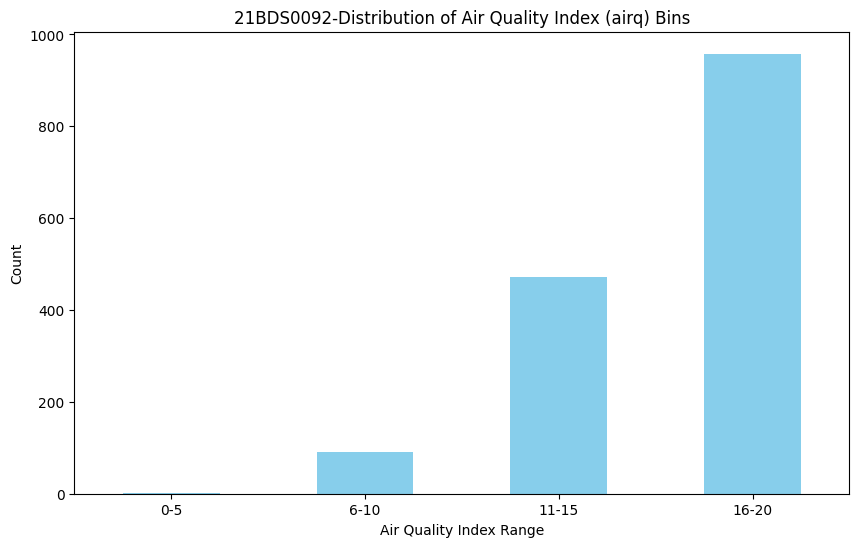

In [ ]:
bins = [0, 5, 10, 15, 20]
labels = ['0-5', '6-10', '11-15', '16-20']
df['airq_range'] = pd.cut(df['airq'], bins=bins, labels=labels)

# Bar plot for airq bin counts
df['airq_range'].value_counts().sort_index().plot(kind='bar', figsize=(10,6), color='skyblue')

plt.title("21BDS0092-Distribution of Air Quality Index (airq) Bins")
plt.ylabel('Count')
plt.xlabel('Air Quality Index Range')
plt.xticks(rotation=0)
plt.show()

### Distribution Plot for 'airq'


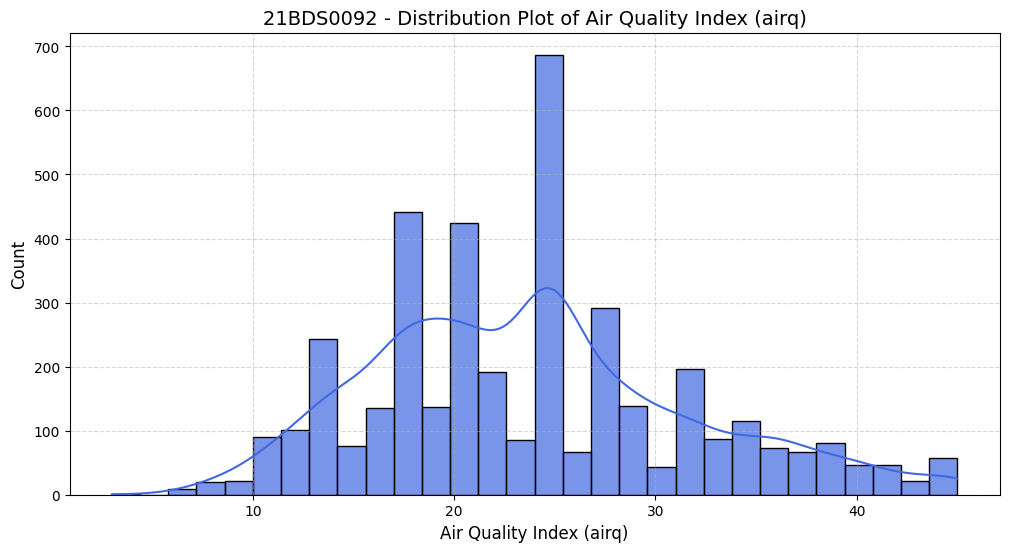

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df["airq"], bins=30, kde=True, color="royalblue", alpha=0.7)
plt.title("21BDS0092 - Distribution Plot of Air Quality Index (airq)", fontsize=14)
plt.xlabel("Air Quality Index (airq)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()



### Boxplot for airq

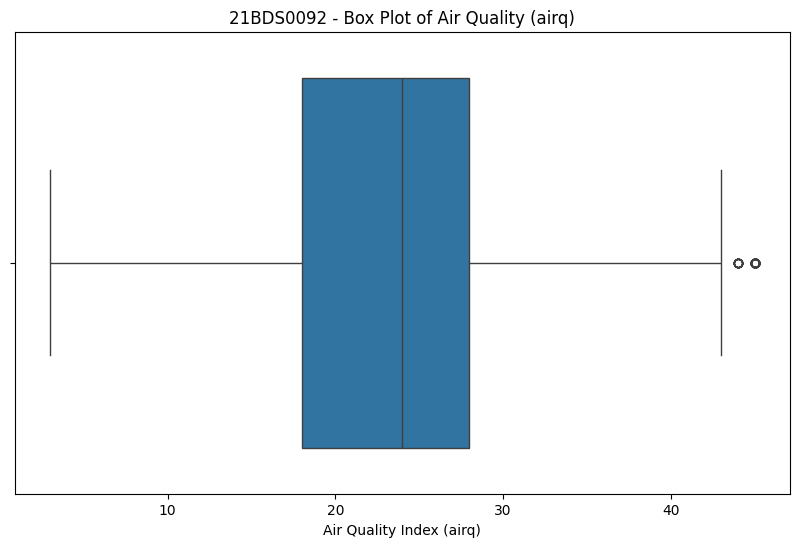

In [ ]:
# Box Plot for 'airq'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['airq'])
plt.title('21BDS0092 - Box Plot of Air Quality (airq)')
plt.xlabel('Air Quality Index (airq)')
plt.show()

### KDE plot for airq

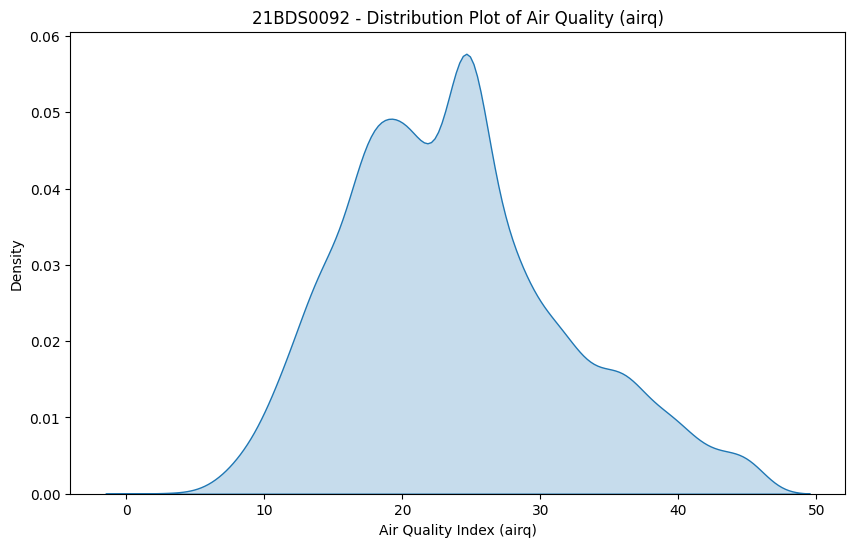

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['airq'], fill=True)
plt.title('21BDS0092 - Distribution Plot of Air Quality (airq)')
plt.xlabel('Air Quality Index (airq)')
plt.ylabel('Density')
plt.show()

## Bivariate analysis

### Scatterplot

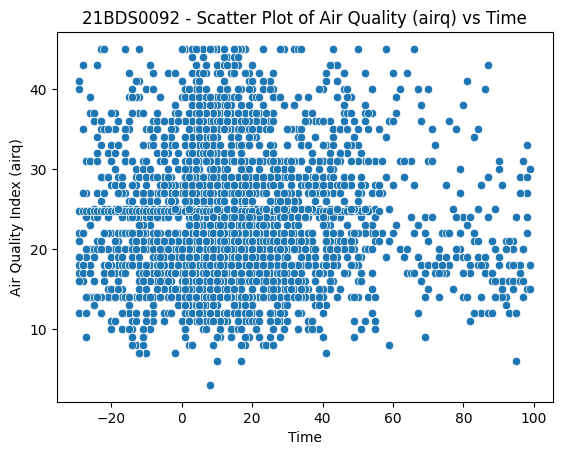

In [ ]:
sns.scatterplot(x=df['time'], y=df['airq'])
plt.title('21BDS0092 - Scatter Plot of Air Quality (airq) vs Time')
plt.xlabel('Time')
plt.ylabel('Air Quality Index (airq)')
plt.show()


In [ ]:
#Relationshipt between two features (Positive Correlation)
correlation_matrix = np.corrcoef(df["time"], df["airq"])
print(correlation_matrix)

[[1.         0.00944644]
 [0.00944644 1.        ]]


In [ ]:
#Relationshipt between two features (negative Correlation)
correlation_matrix = np.corrcoef(df["dos"], df["airq"])
print(correlation_matrix)

[[ 1.         -0.10583236]
 [-0.10583236  1.        ]]


### some of the important boxplots

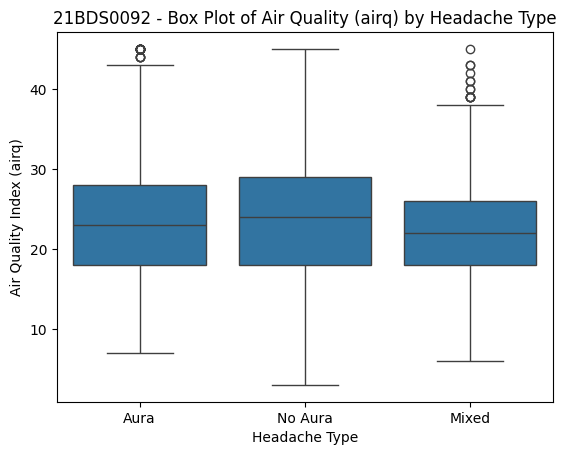

In [ ]:
sns.boxplot(x="hatype", y="airq", data=df)
plt.title("21BDS0092 - Box Plot of Air Quality (airq) by Headache Type")
plt.xlabel("Headache Type")
plt.ylabel("Air Quality Index (airq)")
plt.show()


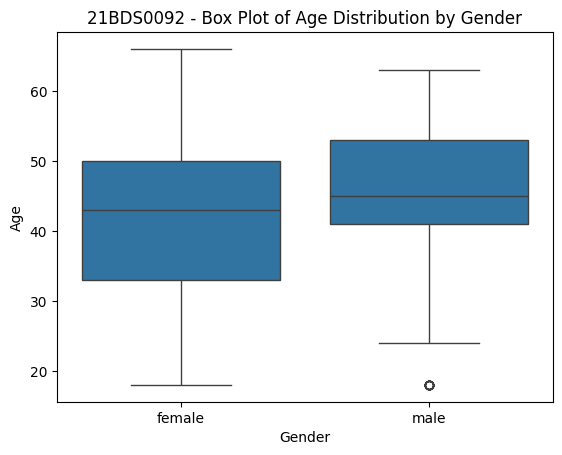

In [ ]:
sns.boxplot(x="sex", y="age", data=df)
plt.title("21BDS0092 - Box Plot of Age Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Age")
plt.show()

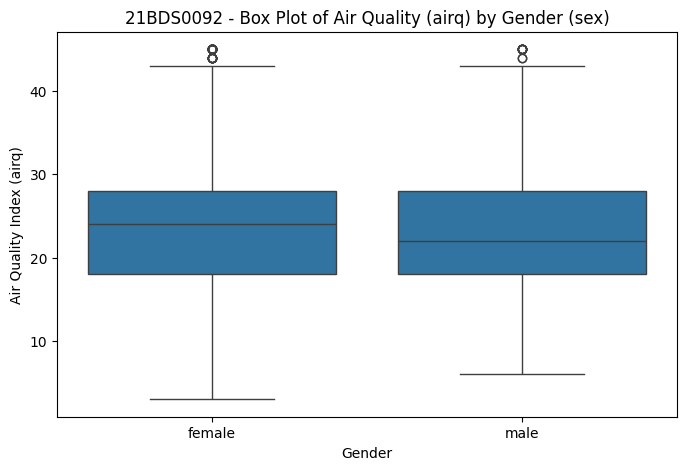

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="sex", y="airq", data=df)
plt.title("21BDS0092 - Box Plot of Air Quality (airq) by Gender (sex)")
plt.xlabel("Gender")
plt.ylabel("Air Quality Index (airq)")
plt.show()

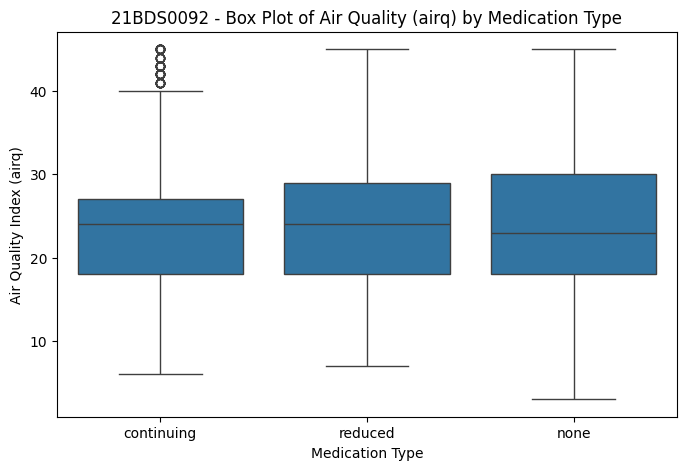

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="medication", y="airq", data=df)
plt.title("21BDS0092 - Box Plot of Air Quality (airq) by Medication Type")
plt.xlabel("Medication Type")
plt.ylabel("Air Quality Index (airq)")
plt.show()


## Multivariate analysis

### Pair plot

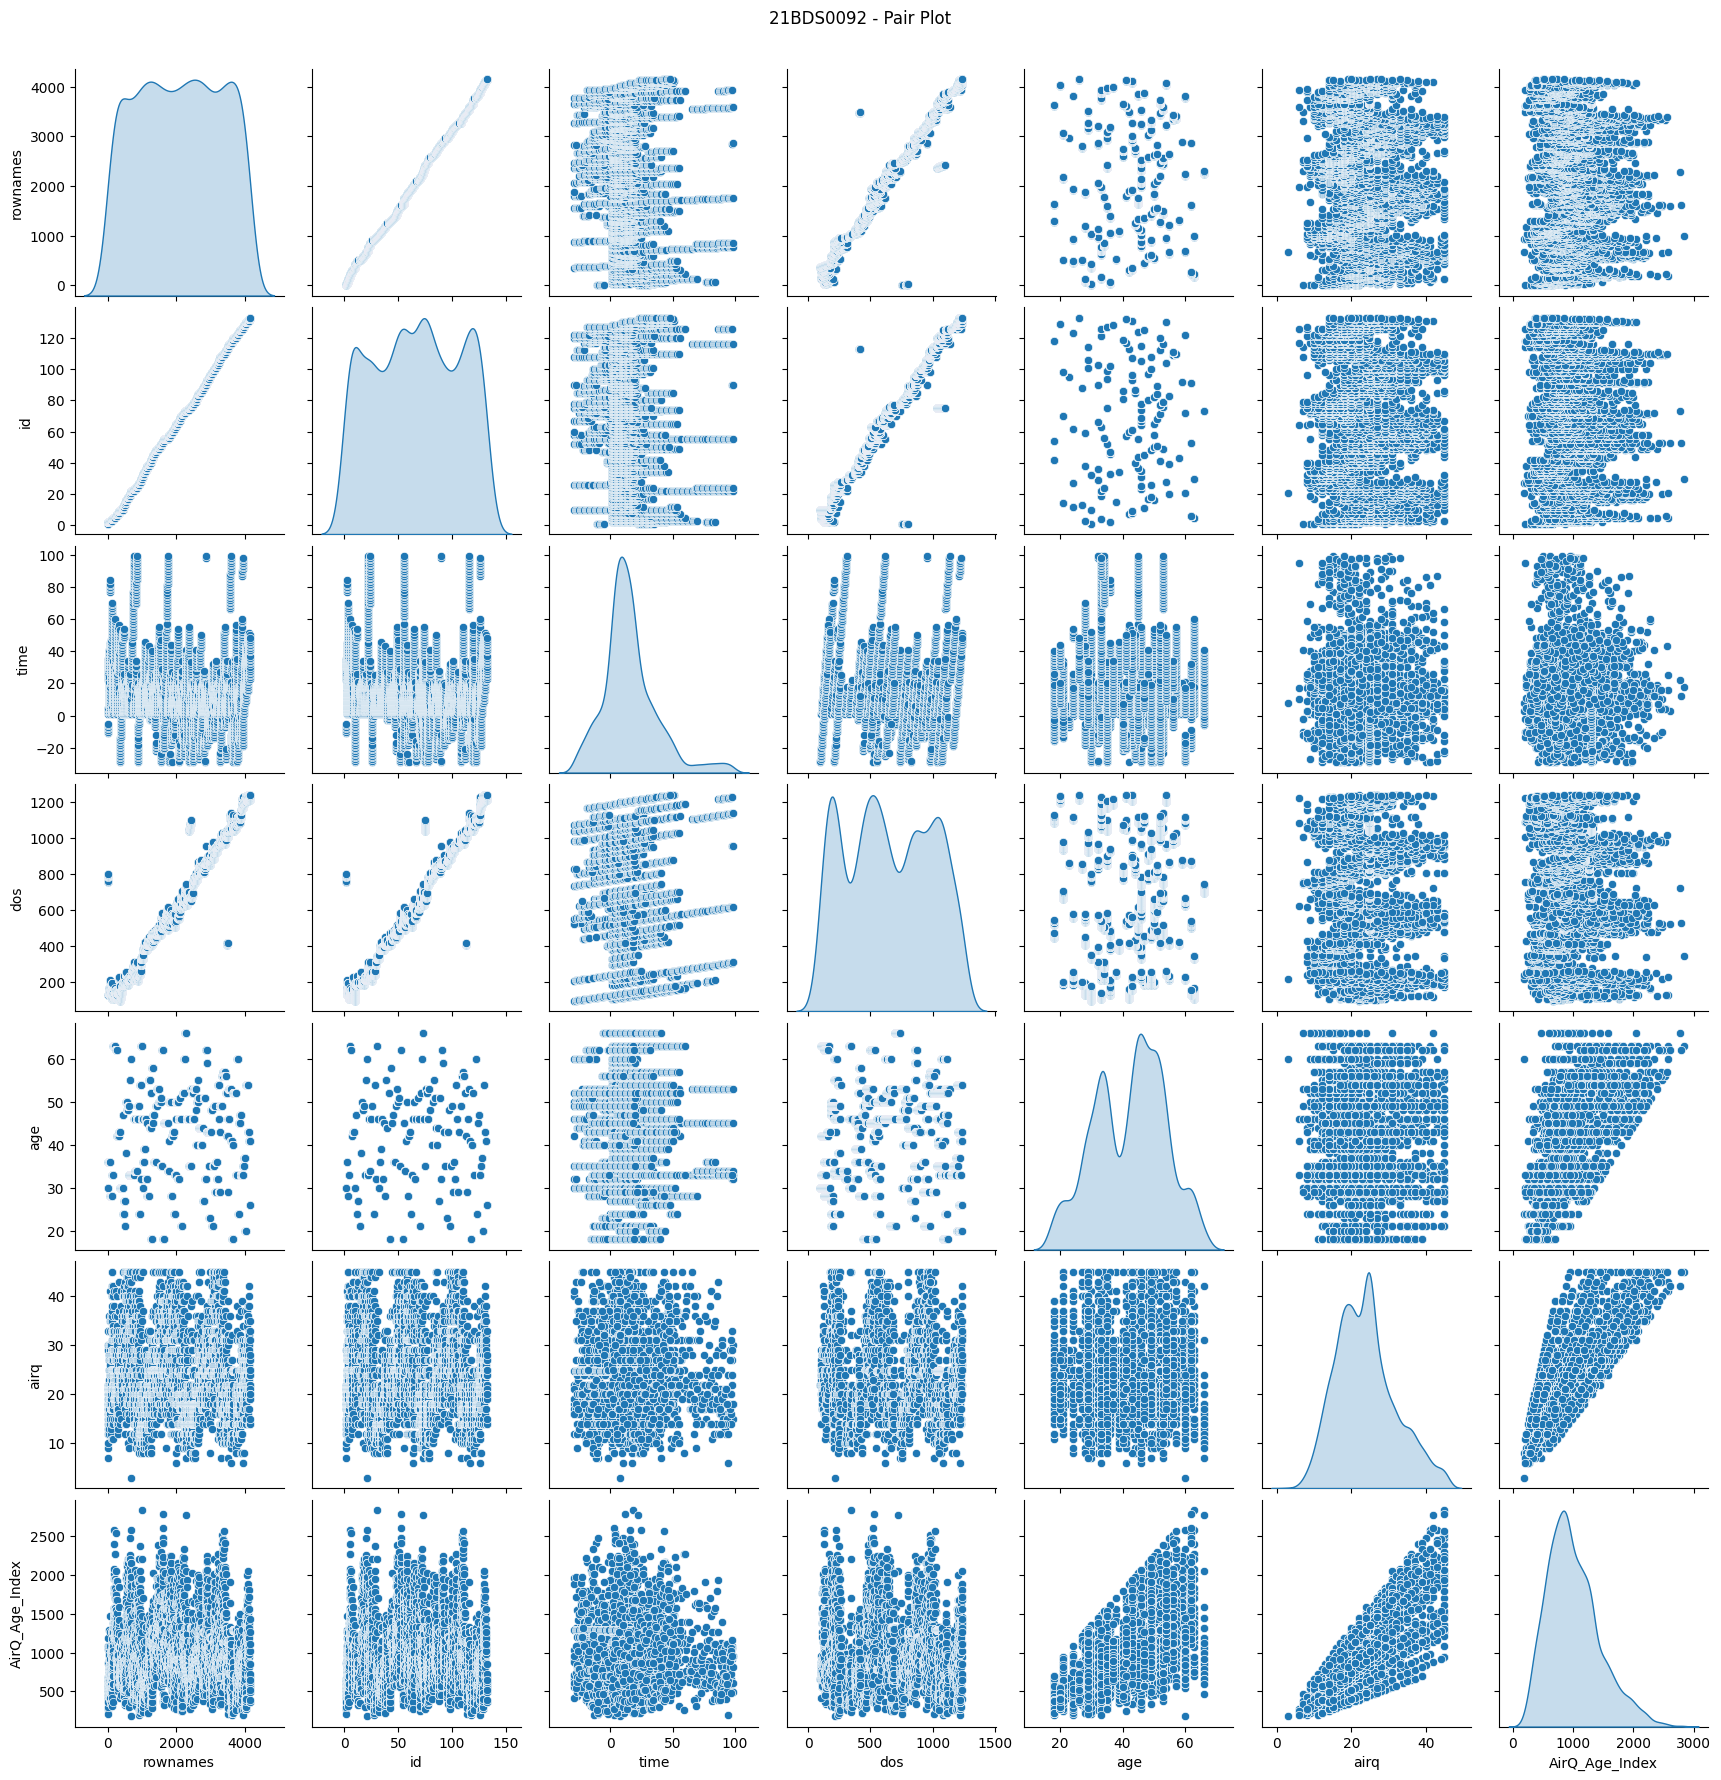

In [ ]:
df_numeric = df.select_dtypes(include=['number']) #choosing only numerical value

# Pair plot
sns.pairplot(df_numeric, diag_kind='kde')
plt.suptitle('21BDS0092 - Pair Plot', y=1.02)
plt.show()

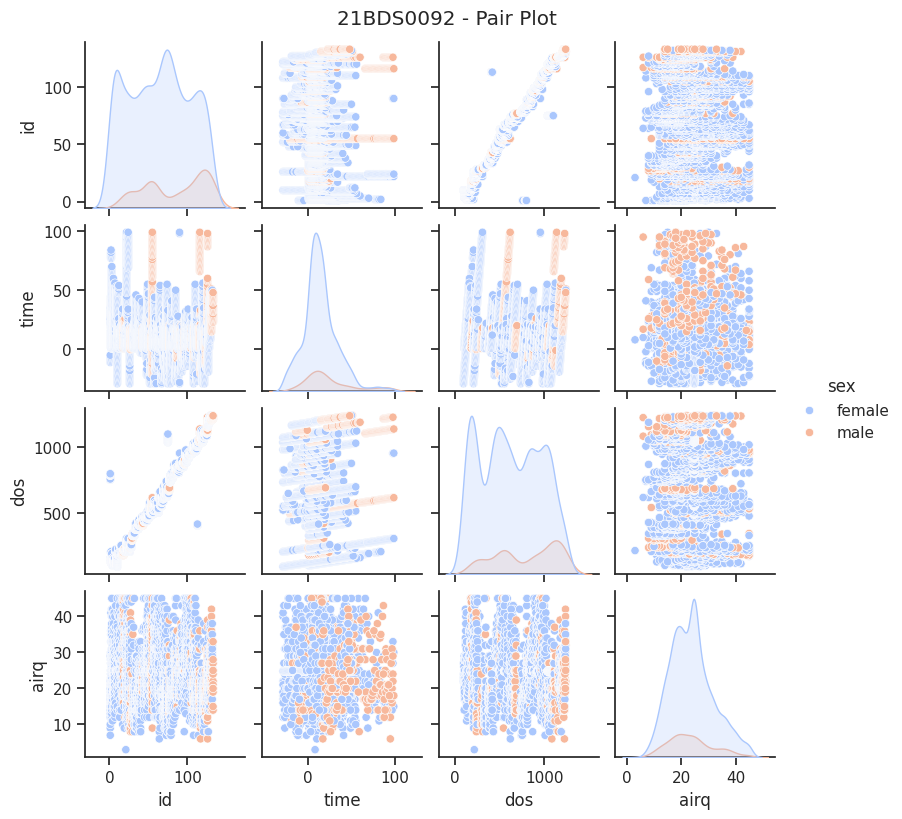

In [ ]:
sns.set(style="ticks", color_codes=True)

g = sns.pairplot(df, height=2, vars=['id', 'time', 'dos', 'airq'], hue="sex", diag_kind='kde', palette='coolwarm')
plt.suptitle('21BDS0092 - Pair Plot', y=1.02)
plt.show()

In [ ]:
corr = stats.pearsonr(df["age"], df["airq"])

# Print results
print("p-value:\t", corr[1])
print("correlation:\t", corr[0])

p-value:	 0.4819151562133462
correlation:	 -0.011129067364146952


In [ ]:
correlation = df.corr(method='pearson', numeric_only=True)
print(correlation)

                rownames        id      time       dos       age      airq  \
rownames        1.000000  0.999396 -0.132514  0.970846  0.060832 -0.081303   
id              0.999396  1.000000 -0.138644  0.970565  0.063080 -0.079368   
time           -0.132514 -0.138644  1.000000 -0.088089 -0.057223  0.009446   
dos             0.970846  0.970565 -0.088089  1.000000  0.026535 -0.105832   
age             0.060832  0.063080 -0.057223  0.026535  1.000000 -0.011129   
airq           -0.081303 -0.079368  0.009446 -0.105832 -0.011129  1.000000   
AirQ_Age_Index -0.026332 -0.023055 -0.029477 -0.062521  0.601837  0.764594   

                AirQ_Age_Index  
rownames             -0.026332  
id                   -0.023055  
time                 -0.029477  
dos                  -0.062521  
age                   0.601837  
airq                  0.764594  
AirQ_Age_Index        1.000000  


### Heatmap

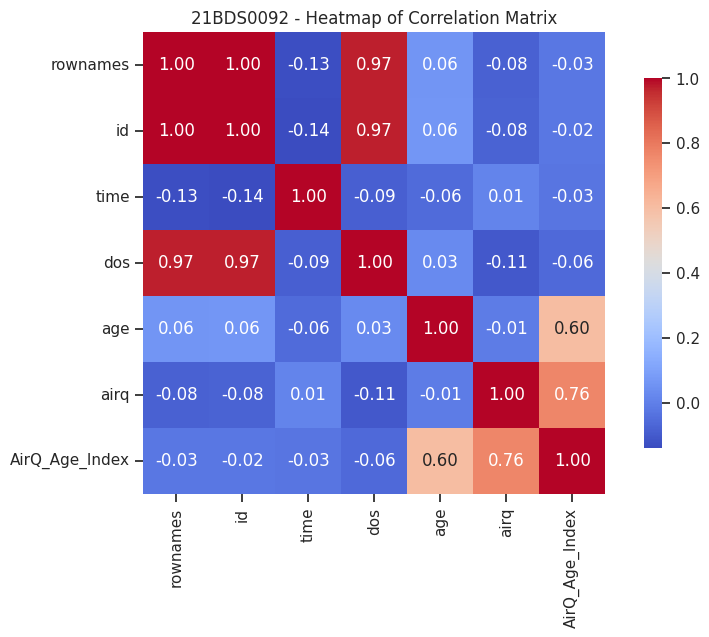

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": 0.8})
plt.title('21BDS0092 - Heatmap of Correlation Matrix')
plt.show()

## Time Series Analysis

### Why Time Series Analysis is NOT Suitable for my Data?

1️ **Time is Relative, Not Sequential**  
   - My time values represent before/after an event, not actual dates/timestamps.  
   - Time series models require continuous, real-world timestamps (e.g., daily, monthly).  

2️ **Irregular Intervals**  
   - Time series assumes equally spaced data points (e.g., hourly, daily).  
   - My time values may not be evenly spaced.  

3️ **No True Trend or Seasonality**  
   - Time series models analyze long-term trends & cycles (e.g., sales over years).  
   - My data tracks changes around an event, which is not cyclic or seasonal.  

4️ **Event-Based, Not Time-Based**  
   - My dataset is better suited for before/after comparisons rather than forecasting future values.  

### But we can perform some general event based analysis as follows

### Plot air quality trend over time

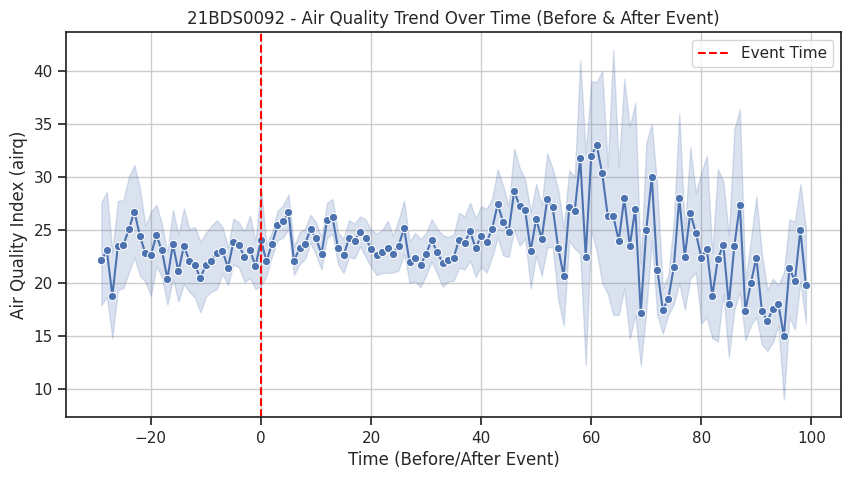

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=df['time'], y=df['airq'], marker='o', linestyle='-')

plt.xlabel("Time (Before/After Event)")
plt.ylabel("Air Quality Index (airq)")
plt.title("21BDS0092 - Air Quality Trend Over Time (Before & After Event)")
plt.axvline(x=0, color='red', linestyle='--', label="Event Time")
plt.legend()
plt.grid(True)
plt.show()


### Box plot to compare air quality before vs. after the event

<ipython-input-46-6dcdcf123f47>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_category'] = df['time'].apply(lambda t: 'Before' if t < 0 else 'After')
<ipython-input-46-6dcdcf123f47>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='time_category', y='airq', data=df, palette="coolwarm")


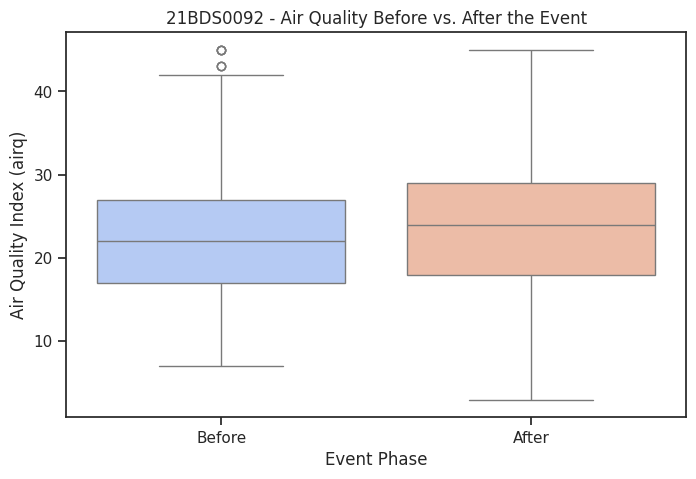

In [ ]:
df['time_category'] = df['time'].apply(lambda t: 'Before' if t < 0 else 'After')
plt.figure(figsize=(8, 5))
sns.boxplot(x='time_category', y='airq', data=df, palette="coolwarm")

plt.title("21BDS0092 - Air Quality Before vs. After the Event")
plt.xlabel("Event Phase")
plt.ylabel("Air Quality Index (airq)")
plt.show()


### Statistical Test: Does Air Quality Change After the Event?

In [ ]:
before_airq = df[df['time'] < 0]['airq']
after_airq = df[df['time'] >= 0]['airq']
stat, p = ttest_ind(before_airq, after_airq, equal_var=False)
print(f"T-test Statistic: {stat:.3f}, P-value: {p:.5f}")

if p < 0.05:
    print("It pass--> Significant difference in air quality before and after the event!")
else:
    print("Fail--> No significant change in air quality before and after the event.")


T-test Statistic: -4.107, P-value: 0.00004
It pass--> Significant difference in air quality before and after the event!
